In [4]:
# This code is copied from code4.ipynb on 20/03/2024
# changes to this code in previous assginemnts should be changed here. 
# possible error :)

import copy
import numpy as np
import matplotlib.pyplot as plt

class Polynomial:
    def __init__(self, coeff):
        self.coeff = coeff
        self.n = len(coeff)

    def __len__(self):
        return self.n
    
    def __str__(self):
        ans = "Coefficients of the polynomial are:\n"
        for ele in self.coeff:
            ans += str(ele) + " "
        ans += "\n"
        return ans
    
    def __add__(self, p2):
        if isinstance(p2, Polynomial) == False:
            raise TypeError("Unsupported operand type(s) for +: '{}' and '{}'".format(
                type(self).__name__, type(p2).__name__))
        ans = []
        i, j = 0, 0
        while i < self.n and  j < len(p2):
            ans.append(self.coeff[i] + p2.coeff[j])
            i += 1
            j += 1
        while i < self.n:
            ans.append(self.coeff[i])
            i += 1
        while j < len(p2):
            ans.append(p2.coeff[j])
            j += 1
        return Polynomial(ans)

    def __sub__(self, p2):
        if isinstance(p2, Polynomial) == False:
            raise TypeError("Unsupported operand type(s) for -: '{}' and '{}'".format(
                type(self).__name__, type(p2).__name__))
        ans = []
        i, j = 0, 0
        while i < self.n and j < len(p2):
            ans.append(self.coeff[i] - p2.coeff[j])
            i += 1
            j += 1
        while i < self.n:
            ans.append(self.coeff[i])
            i += 1
        while j < len(p2):
            ans.append(-p2.coeff[j])
            j += 1
        return Polynomial(ans)
    
    def __truediv__(self, num):
        return Polynomial([ele/num for ele in self.coeff])
    
    def __mul__(self, poly):
        if type(poly) == int or type(poly) == float:
            return Polynomial([ele*poly for ele in self.coeff])
        if type(poly) != Polynomial:
            raise TypeError("Unsupported operand type(s) for * : '{}' and '{}'".format(
                type(self).__name__, type(poly).__name__))
        
        n = self.n
        m = len(poly)
        new_degree = n+m-1
        new_coeff = [0 for _ in range(new_degree)]
        
        for i in range(n):
            for j in range(m):
                new_coeff[i+j] += (self.coeff[i] * poly.coeff[j])
                
        return Polynomial(new_coeff)

    def __rmul__(self, poly):
        if type(poly) == int or type(poly) == float:
            return Polynomial([ele*poly for ele in self.coeff])
        if type(poly) != Polynomial:
            raise TypeError("Unsupported operand type(s) for * : '{}' and '{}'".format(
                type(self).__name__, type(poly).__name__))
        
        n = self.n
        m = len(poly)
        new_degree = n+m-1
        new_coeff = [0 for _ in range(new_degree)]
        
        for i in range(n):
            for j in range(m):
                new_coeff[i+j] += (self.coeff[i] * poly.coeff[j])
                
        return Polynomial(new_coeff)

    def __getitem__(self, num):
        if type(num) != int and type(num) != float:
            raise TypeError("Unsupported operand for [] : '{}' and '{}'".format(type(self).__name__, type(num).__name__))
        return sum( [self.coeff[i]* (num**i) for i in range(self.n)])
    
    def fitViaMatrixMethod(self, points):
        a = []
        b = []
        n = len(points)
        for x, y in points:
            a.append([x**i for i in range(n)])
            b.append(y)
        a = np.array(a)
        n = np.array(b)
        self.coeff = list(np.linalg.solve(a, b))
        self.n = len(self.coeff)

        x_points = [x for x, y in points]
        y_points = [y for x, y in points]
        plt.scatter(x_points, y_points, color = 'red')
        self.show(min(x_points), max(x_points))
        return

    
    def phi_j(self, j, points, n):
        # n is number of points
        numerator = Polynomial([1]) # initialized like this for ease
        denominator = 1
        xj, yj = points[j]
        for i in range(n):
            xi, yi = points[i]
            if i != j:
                numerator  = numerator*Polynomial([-xi, 1])
                denominator *= (xj - xi)
        return numerator/denominator
        
    def fitViaLagrangePoly(self, points):
        n = len(points)
        ans = Polynomial([]) 
        for j in range(n):
            xj, yj = points[j]
            ans = ans + yj * self.phi_j(j, points, n)
        
        self.coeff = ans.coeff
        self.n = len(ans.coeff)
        x_points = [x for x, y in points]
        y_points = [y for x, y in points]
        plt.scatter(x_points, y_points, color = 'red')
        self.show(min(x_points), max(x_points))
        return
    
    def show(self, a, b, step = 0.25/2):

        plt.plot([a + step*i for i in range(int((b-a)/step) + 1)], [ self[a + step*i]  for i in range(int((b-a)/step) + 1)])
        plt.xlabel("x ->")
        plt.ylabel("value (y)")
        plt.title("Plotting polynomial from " +  str(a) + " to " + str(b))
        plt.grid()
        plt.legend()
        # plt.show()
        return plt

    def derivative(self):
        new_coeff = []
        for i in range(1, self.n):
            new_coeff.append(i*self.coeff[i])
        return Polynomial(new_coeff)
    
    '''I dont think follwing is the area, it is definite integral '''
    def area(self, a, b):
        new_coeff = [0, ]
        for i in range(self.n):
            new_coeff.append(self.coeff[i]/(i+1))
        I = Polynomial(new_coeff)
        return  I[b] - I[a]

1) Write a function to compute the polynomial of degree up to n that is the best fit for a given
set of points. It should take as its arguments an array of tuples and an integer n, and return
an object of type Polynomial (developed in the last coding assignment). The function is also
expected to produce a plot of the input points along with the best-fit polynomial together.

In [5]:
import matplotlib.pyplot as plt
import scipy

def best_fit_polynomial(n, points, m):
    '''function best_fit_polynomial will take points as input and returns a best fit polynomial by solving normal equations'''
    '''n - is the maximum degree of the polynomial'''
    '''m - number of points'''
    '''It makes sense to have 1+n <= m '''
    '''For 1+n > m, then there might be infinetly many such polynomials '''

    S = [[0 for _ in range(0, n+1)] for _ in range(0, n+1)]
    b = [0 for _ in range(0, n+1)]
    for j in range(0, n+1):
        for k in range(0, n+1):
            for i in range(0, m):
                S[j][k] += (points[i][0] ** (j+k))
        for i in range(0, m):
            b[j] += points[i][1] * (points[i][0] **j)
    a = scipy.linalg.solve(S, b)
    p = Polynomial(a)
    plt.scatter([x for x, y in points], [y for x, y in points], color = 'r', label = 'data points')
    p.show(min([x for x, y in points]), max([x for x, y in points]))
    return p

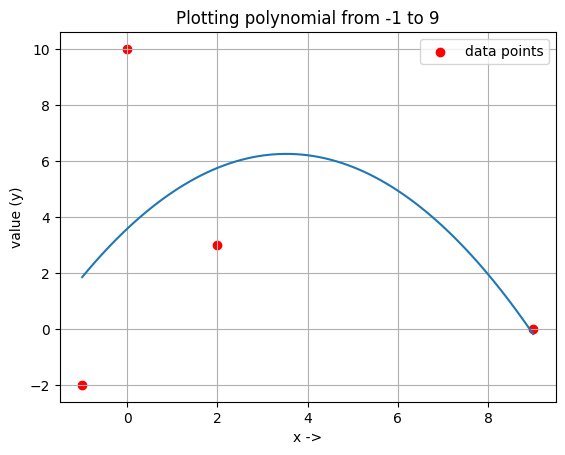

In [6]:
n = 2
points = [(9, 0), (-1, -2), (2, 3), (0, 10)]
m = len(points)
p = best_fit_polynomial(n, points, m)

Coefficients of the polynomial are:
-8.98554778554776 0.2090132090132096 0.9662004662004623 1.1068376068376073 



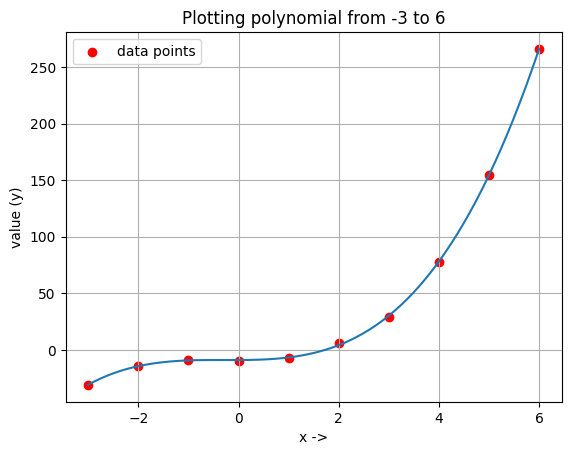

In [7]:
# let us check whether code is indeed finding optimal solution
# let true polynomial be x^ 3 + 2x - 10
# and let us take some points on the true polynomial: (−3,−31),(−2,−14),(−1,−9),(0,−10),(1,−7),(2,6),(3,29),(4,78),(5,155),(6,266)
points = [(-3,-31),(-2,-14),(-1,-9),(0,-10),(1,-7),(2,6),(3,29),(4,78),(5,155),(6,266)]
m = len(points)
n = 3
p = best_fit_polynomial(n, points, m)
print(p)

In [8]:
# it is indeed correct !!

Coefficients of the polynomial are:
9.999999999999519 5.731746031745929 -5.717460317460003 0.5507936507936178 

Coefficients of the polynomial are:
10.000000000002045 6.548751842617616 -5.133897724036276 0.20028302141819915 -0.1022986279630175 0.01476878396780417 



/tmp/ipykernel_870757/1345759514.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.50352e-21): result may not be accurate.
  a = scipy.linalg.solve(S, b)


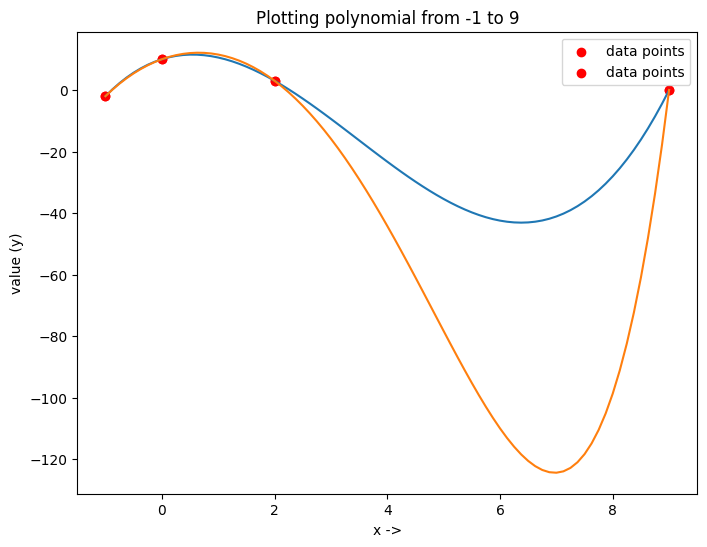

In [9]:
# let us try n+1 > m
# if n + 1 = m there will be unique polynomial
# n+1 > m implies there are infinetly many polynomials

# n + 1 = m
plt.figure(figsize=(8, 6)) 
n = 3
points = [(9, 0), (-1, -2), (2, 3), (0, 10)]
m = len(points)
p = best_fit_polynomial(n, points, m)
print(p)

# n + 1 > m
# output is ill conditioned matrix
# DOUBT : As soon as n + 1 > m a warning came of ill condiiton matrix why 
# There are infinelty many solutions if n+1 > m, so should i just return a polynomial of degree m+1 in that case, will it be okay. 

n = 5
points = [(9, 0), (-1, -2), (2, 3), (0, 10)]
m = len(points)
p = best_fit_polynomial(n, points, m)
print(p)
plt.show()


2) Write a function to compute the polynomial of degree up to n that best approximates the
function sin(x) + cos(x) in the interval [0,π]. It should take as its argument an integer n, and
return an object of type Polynomial (developed in the last coding assignment). The function
is also expected to plot the actual and approximate function together.

In [10]:
# Here for integration I have used my own trapzoidal integration.

import math
from scipy.integrate import quad

'''f(x) is actual function'''
def f(x):
    return math.sin(x) + math.cos(x)

'''Trapezoidal integration'''
def xjf(a, b, p):
    m = int(1e3)
    value = 0
    x = a
    step = (b-a)/m
    for i in range(1, m+1):
        value += p[x]*f(x) + p[x+step]*f(x + step)
        x += step

    return (b-a)/(2*m) * value

def approximate(a_low, b_high, n):
    '''Here least-squares approximation of a function using polynomials is used (with integrating)'''
    '''n - the maximum degree of polynomail to approximate f'''
    
    # S = np.zeros((n+1, n+1))
    # b = np.zeros(n+1)
    S = [[0 for _ in range(0, n+1)] for _ in range(0, n+1)]
    b = [0 for _ in range(0, n+1)]

    # polynomials x^0 , x^1 , ... , x^n
    poly = [Polynomial([1]), ]
    for i in range(1, n+1):
        poly.append(poly[i-1] * Polynomial([0, 1]))

    for j in range(0, n+1):
        for k in range(0, n+1):
            S[j][k] = ((poly[j]) * (poly[k])).area(a_low, b_high)
        b[j] = xjf(a_low, b_high, poly[j])

    '''Solving the equation Sa = b'''
    a_coeff = scipy.linalg.solve(S, b)
    p = Polynomial(a_coeff)

    '''Plotting a plot for comparision'''
    x = a_low
    step = 0.05
    x_values = []
    actual_values = []
    approx_values = []
    while(x <= b_high):
        actual_values.append(f(x))
        approx_values.append(p[x])
        x_values.append(x)
        x += step
    plt.plot(x_values, approx_values, label = 'Polynomail approximation')
    plt.plot(x_values[2:], actual_values[2:], label = 'Actual function')
    plt.legend()
    plt.show()
    return p

/tmp/ipykernel_870757/59575214.py:42: LinAlgWarning: Ill-conditioned matrix (rcond=4.52923e-20): result may not be accurate.
  a_coeff = scipy.linalg.solve(S, b)


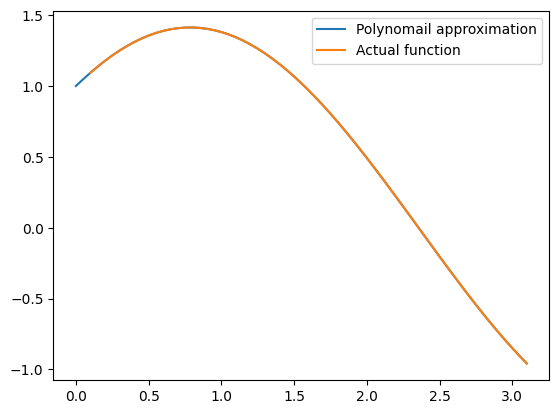

In [11]:
# For n values >= 10 I am getting ill conditioned matrix
p = approximate(0, math.pi, 11)

# that is for p = approximate(0, math.pi, 9) no ill conditioned matrix

3. Write a function that uses the enhanced Polynomial class (developed in the last coding
assignment) to compute the nth Legendre polynomial. It should take as its argument an integer
n, and return an object of type Polynomial that represents the nth Legendre polynomial

STATUS : <br/>
COMPLETE 

In [12]:
def getLegendrePolynomial(n):
    p = Polynomial([1])
    den1 = 1
    den2 = 1
    for i in range(n):
        p = p*Polynomial([-1, 0, 1])
        den1 *= 2
        den2 *= i+1

    for i in range(n):
        p = p.derivative()
    
    return p/(den1*den2)

0.01
L0(x)
Coefficients of the polynomial are:
1.0 

L1(x)
Coefficients of the polynomial are:
0.0 1.0 

L2(x)
Coefficients of the polynomial are:
-0.5 0.0 1.5 

L3(x)
Coefficients of the polynomial are:
0.0 -1.5 0.0 2.5 

L4(x)
Coefficients of the polynomial are:
0.375 0.0 -3.75 0.0 4.375 

L5(x)
Coefficients of the polynomial are:
0.0 1.875 0.0 -8.75 0.0 7.875 



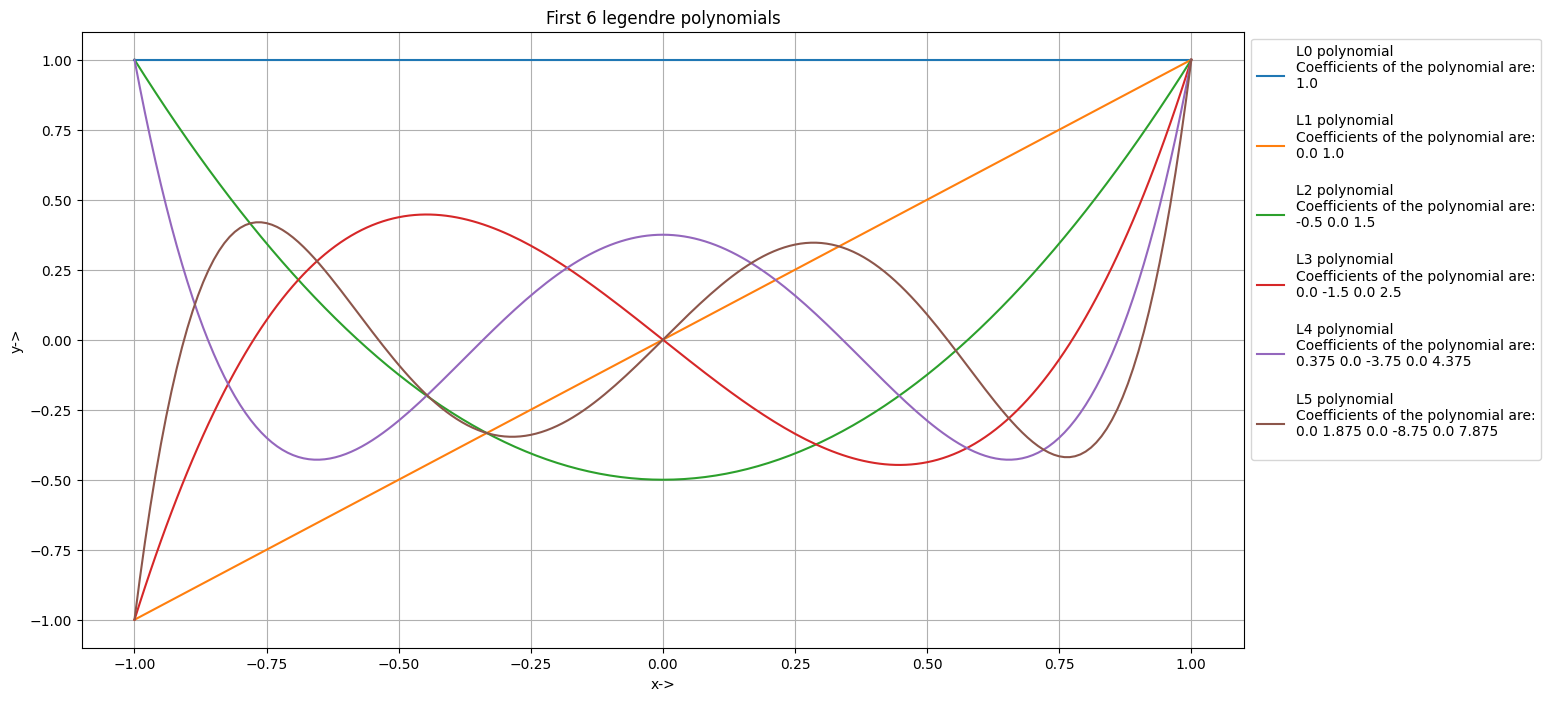

In [13]:
# first 6 Legendre polynomials

import matplotlib.pyplot as plt
import numpy as np

a = -1
b = 1
step = 1e-2
print(step)
x_values = [i for i in np.arange(a, b + step, step)]
fig = plt.figure(figsize=(15, 8))
for i in range(6):
    print("L" + str(i) + "(x)")
    p = getLegendrePolynomial(i)
    print(p)

    y_values = []
    for x in x_values:
        y_values.append(p[float(x)])
    plt.plot(x_values, y_values, label = "L"+ str(i) + " polynomial\n"+ str(p))

plt.xlabel("x->")
plt.ylabel("y->")
plt.title("First 6 legendre polynomials")
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<h1> Question 4</h1>
Write a function to compute the least-square approximation of exin the interval [−1,1] using
the first n Legendre polynomials. It should take as its argument an integer n, and return an
object of type Polynomial. Also, plot the actual and approximate function together

STATUS: <br/>
COMPLETE

In [14]:
# Using first n legendre polynomials to approximate e^x
# using trapezoidal integration method

import math
import matplotlib.pyplot as plt

'''Actual function'''
def f(x):
    return math.exp(x)

def phij_f(a_low, b_high, p):
    m = int(1e3)
    value = 0
    x = a_low
    step = (b_high-a_low)/m
    for i in range(1, m+1):
        value += p[x]*f(x) + p[x+step]*f(x + step)
        x += step

    return (b-a)/(2*m) * value

def legendre_approximation(a_low, b_high, n):
    ''' Approximate f(x) = e^x using first n legendre polynomials (which are orthogonal in [-1, 1])'''
    ''' Note: First n legendre polynomials are L0, L1, .. , Ln-1 '''
    ''' Good news: w(x) = 1. Just ignore :) '''

    phi = [getLegendrePolynomial(i) for i in range(n)]
    a = [0 for i in range(n)]
    for j in range(n):
        cj = (phi[j] * phi[j]).area(a_low, b_high)
        a[j] = (1/(cj)) * (phij_f(a_low, b_high, phi[j]))

    p = Polynomial([0])
    for i in range(n):
        p = p + a[i]*phi[i]
    
    fig = plt.figure(figsize=(10, 5))
    '''Plotting a plot for comparision'''
    x = a_low
    step = 0.05
    x_values = []
    actual_values = []
    approx_values = []
    while(x <= b_high):
        actual_values.append(f(x))
        approx_values.append(p[x])
        x_values.append(x)
        x += step
    plt.plot(x_values, approx_values, label = 'Polynomail approximation using 1st ' + str(n) + ' legendre polynomials')
    plt.plot(x_values[2:], actual_values[2:], label = 'Actual function e^x ')
    plt.xlabel("x->")
    plt.ylabel("y->")
    plt.legend(bbox_to_anchor=(0.9, 1.10), ncol=2)
    plt.show()
    return p

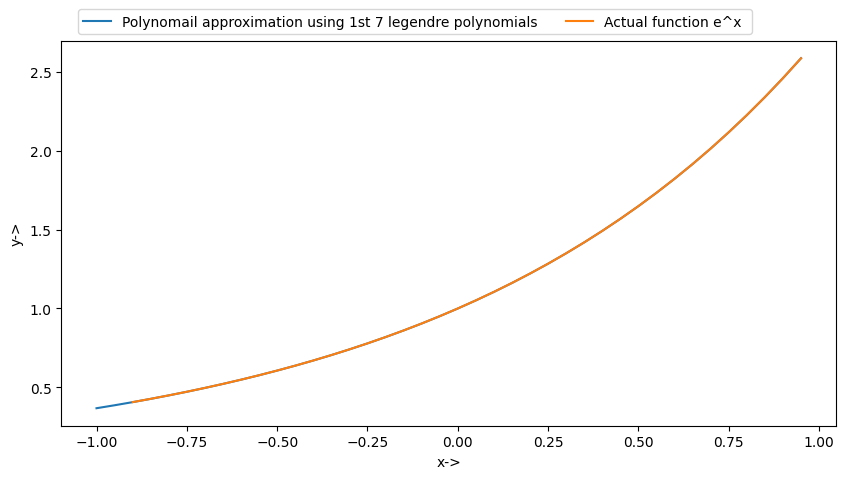

Coefficients of the polynomial are:
0.9999686258024605 1.0001210361284545 0.5007875812824671 0.16595276832775452 0.03899261295327937 0.009212804231671885 0.003536702564979554 



In [15]:
p = legendre_approximation(-1, 1, 7)
print(p)

Question 5 <br/>
5. Write a function that uses the enhanced Polynomial class (developed in the last coding
assignment) to compute the n
th Chebyshev polynomial. It should take as its argument an integer
n, and return an object of type Polynomial that represents the n
th Chebyshev polynomial.

In [16]:
'''Function to find nth chebyshev polynomial'''
def getChebyshevPolynomial(n):
    if n == 0:
        return Polynomial([1])
    if n == 1:
        return Polynomial([0, 1])
    return 2*Polynomial([0, 1])*getChebyshevPolynomial(n-1) - getChebyshevPolynomial(n-2)

T0(x)
Coefficients of the polynomial are:
1 

T1(x)
Coefficients of the polynomial are:
0 1 

T2(x)
Coefficients of the polynomial are:
-1 0 2 

T3(x)
Coefficients of the polynomial are:
0 -3 0 4 

T4(x)
Coefficients of the polynomial are:
1 0 -8 0 8 

T5(x)
Coefficients of the polynomial are:
0 5 0 -20 0 16 



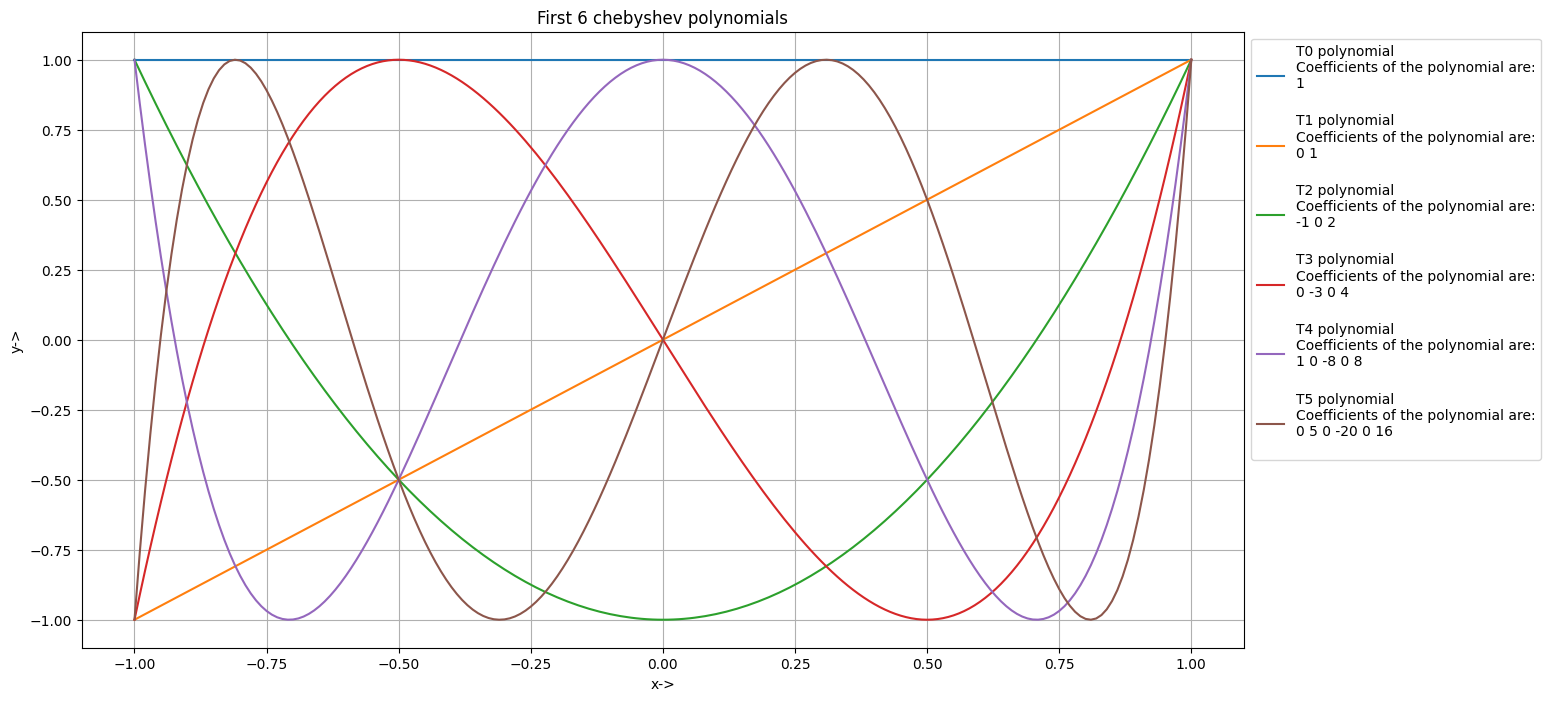

In [17]:
# first 6 Chebyshev polynomials
# article : https://en.wikipedia.org/wiki/Chebyshev_polynomials

import matplotlib.pyplot as plt
import numpy as np

a = -1
b = 1
step = 1e-2

x_values = [float(i) for i in np.arange(a, b + step, step)]
fig = plt.figure(figsize=(15, 8))
for i in range(6):
    print("T" + str(i) + "(x)")
    p = getChebyshevPolynomial(i)
    print(p)

    y_values = []
    for x in x_values:
        y_values.append(p[x])
    plt.plot(x_values, y_values, label = "T"+ str(i) + " polynomial\n"+ str(p))

plt.xlabel("x->")
plt.ylabel("y->")
plt.title("First 6 chebyshev polynomials")
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<h1> Question 6: </h1>
Write a function to compute the first 5 Chebyshev polynomials and numerically demonstrate
that they are orthogonal with respect the weight function w(x) = 1/
√
1 − x
2 in the interval
[−1, 1].

NOTE: If you use trapezoidal integration it is not working fine, it is not good one

In [18]:
'''Numerically verifying that first 5 chebsychev polynomials are orthogonal '''
from scipy import integrate

num = 5
poly = [getChebyshevPolynomial(i) for i in range(num)]

a_low = -1
b_high = 1
c = [[0 for i in range(num)] for j in range(num)]
for i in range(num):
    for j in range(num):
        f = lambda x : poly[i][x]*poly[j][x]/((1-x*x)**(0.5))
        c[i][j] = integrate.quad(f, -1, 1)[0]   
                                        
print("c values:")
for i in range(num):
    for j in range(num):
        print(c[i][j], end = " ")
    print()

c values:
3.141592653589591 0.0 -2.0539425025254275e-13 0.0 -5.320417372504701e-12 
0.0 1.570796326794678 0.0 5.868116894612114e-12 0.0 
-2.0539425025254275e-13 0.0 1.5707963267948821 0.0 -2.1363610013053174e-12 
0.0 5.868116894612114e-12 0.0 1.5707963267927294 0.0 
-5.320417372504701e-12 0.0 -2.1363610013053174e-12 0.0 1.5707963267929148 


<h1> Question 7 </h1>
Write a function to compute coefficients of the best-fit Fourier approximation Sn(x) of function e^x
in the interval [−π, π]. It should take as its arguments an integer n, and print the coefficients
of Sn(x). The function is also expected to generate a plot with the actual and approximate
function together.

In [19]:
import math

def best_fit_fourier_approximation(f, n):
    low = -math.pi
    high = math.pi

    a = [(1/math.pi)*quad(lambda x: f(x)*math.cos(k*x), low, high)[0] for k in range(0, n+1)] # a0, a1, .. , an 
    b = [(1/math.pi)*quad(lambda x: f(x)*math.sin(k*x), low, high)[0] for k in range(0, n+1)] # b0, b1, ... , bn
    
    Sn = lambda x: a[0]/2 + sum([a[k]*math.cos(k*x) for k in range(1, n+1)]) + sum([b[k]*math.sin(k*x) for k in range(1, n+1)])
    for i in range(0, n+1):
        print("a[{}] = {}".format(i, a[i]))
    for i in range(0, n+1):
        print("b[{}] = {}".format(i, b[i]))

    # plotting f, and Sn(x)
    x_values = np.linspace(low, high, 10000)
    actual_values = [f(x) for x in x_values]
    approx_values = [Sn(x) for x in x_values]


    plt.title("Fourier series approximation ")
    plt.xlabel('x ->')
    plt.ylabel('y ->')
    plt.plot(x_values, actual_values, label = 'actual function ')
    plt.plot(x_values, approx_values, label = 'S' + str(n)+ "(x)")

    plt.legend()
    plt.show()



In [20]:
f = lambda x: math.exp(x)

a[0] = 7.352155820749955
a[1] = -3.6760779103749774
a[2] = 1.4704311641499912
a[3] = -0.7352155820749962
a[4] = 0.43247975416176204
a[5] = -0.28277522387499693
a[6] = 0.1987069140743238
a[7] = -0.14704311641499965
a[8] = 0.11311008954999857
a[9] = -0.08966043683841039
a[10] = 0.07279362198762246
b[0] = 0.0
b[1] = 3.6760779103749774
b[2] = -2.9408623282999815
b[3] = 2.2056467462249865
b[4] = -1.7299190166470477
b[5] = 1.413876119374991
b[6] = -1.19224148444594
b[7] = 1.0293018149049926
b[8] = -0.9048807163999938
b[9] = 0.8069439315457274
b[10] = -0.727936219876233


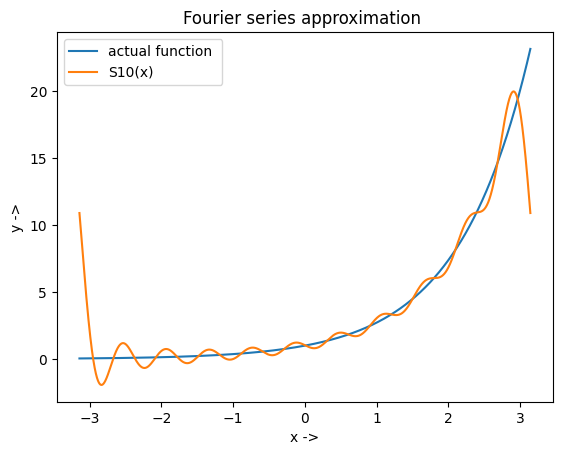

In [21]:
best_fit_fourier_approximation(f, 10)

a[0] = 7.352155820749955
a[1] = -3.6760779103749774
a[2] = 1.4704311641499912
a[3] = -0.7352155820749962
a[4] = 0.43247975416176204
a[5] = -0.28277522387499693
a[6] = 0.1987069140743238
a[7] = -0.14704311641499965
a[8] = 0.11311008954999857
a[9] = -0.08966043683841039
a[10] = 0.07279362198762246
a[11] = -0.06026357230122916
a[12] = 0.050704522901722955
a[13] = -0.043247975416174644
a[14] = 0.037320587922588695
a[15] = -0.032531662923671156
a[16] = 0.028607610197469196
a[17] = -0.025352261450860124
a[18] = 0.022622017910001114
a[19] = -0.020309822709252457
a[20] = 0.018334553168951693
a[21] = -0.01663383669852685
a[22] = 0.015159084166490651
a[23] = -0.013871992114616576
a[24] = 0.012742037817581552
a[25] = -0.011744657860617635
a[26] = 0.01085990520051244
a[27] = -0.01007144632979467
a[28] = 0.009365803593310686
a[29] = -0.008731776509201754
a[30] = 0.00815999536154593
a[31] = -0.007642573618247738
a[32] = 0.007172834947073844
a[33] = -0.006745097083257103
a[34] = 0.006354499412926184


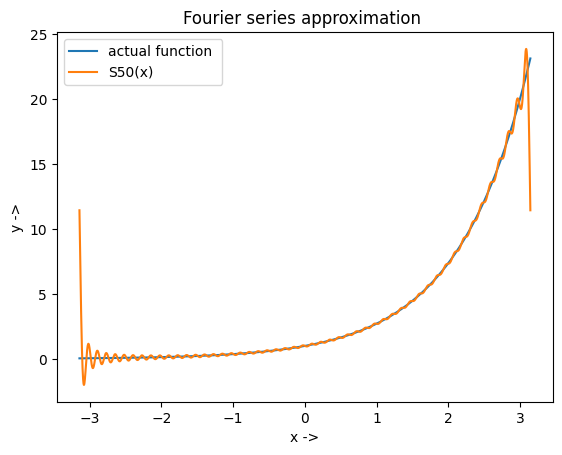

In [22]:
best_fit_fourier_approximation(f, 50)

/tmp/ipykernel_870757/175019458.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a = [(1/math.pi)*quad(lambda x: f(x)*math.cos(k*x), low, high)[0] for k in range(0, n+1)] # a0, a1, .. , an
/tmp/ipykernel_870757/175019458.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval an

a[0] = 7.352155820749955
a[1] = -3.6760779103749774
a[2] = 1.4704311641499912
a[3] = -0.7352155820749962
a[4] = 0.43247975416176204
a[5] = -0.28277522387499693
a[6] = 0.1987069140743238
a[7] = -0.14704311641499965
a[8] = 0.11311008954999857
a[9] = -0.08966043683841039
a[10] = 0.07279362198762246
a[11] = -0.06026357230122916
a[12] = 0.050704522901722955
a[13] = -0.043247975416174644
a[14] = 0.037320587922588695
a[15] = -0.032531662923671156
a[16] = 0.028607610197469196
a[17] = -0.025352261450860124
a[18] = 0.022622017910001114
a[19] = -0.020309822709252457
a[20] = 0.018334553168951693
a[21] = -0.01663383669852685
a[22] = 0.015159084166490651
a[23] = -0.013871992114616576
a[24] = 0.012742037817581552
a[25] = -0.011744657860617635
a[26] = 0.01085990520051244
a[27] = -0.01007144632979467
a[28] = 0.009365803593310686
a[29] = -0.008731776509201754
a[30] = 0.00815999536154593
a[31] = -0.007642573618247738
a[32] = 0.007172834947073844
a[33] = -0.006745097083257103
a[34] = 0.006354499412926184


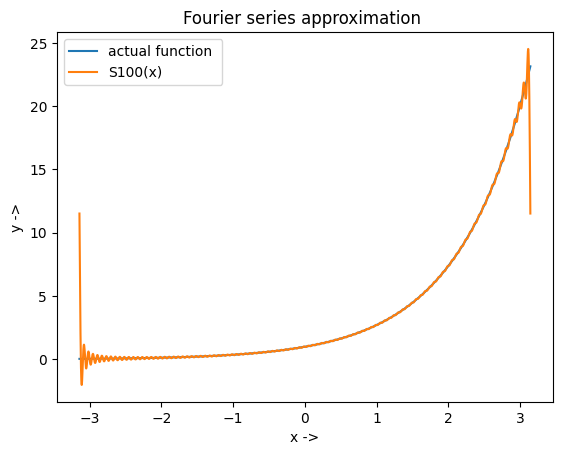

In [23]:
best_fit_fourier_approximation(f, 100)

<h1> Question 8 </h1>
Using Python’s scipy.fft package, write a function, with time complexity of O(n log n), to
multiply two large n-digit integers.

In [24]:
import numpy as np
from scipy.fft import fft, ifft

def multiply_large_integers(a, b):
    # Convert the integers to strings and reverse them for easier manipulation
    a_str = str(a)[::-1]
    b_str = str(b)[::-1]

    # Calculate the size of the FFT
    n = len(a_str) + len(b_str) - 1
    fft_size = 1
    while fft_size < n:
        fft_size *= 2

    # Perform FFT on the reversed strings
    fft_a = fft([int(digit) for digit in a_str], fft_size)
    fft_b = fft([int(digit) for digit in b_str], fft_size)

    # Multiply the FFT results
    fft_result = fft_a * fft_b

    # Perform inverse FFT to get the product
    result = np.rint(ifft(fft_result)).astype(int)

    # Normalize the result
    carry = 0
    for i in range(len(result)):
        result[i] += carry
        carry = result[i] // 10
        result[i] %= 10

    # Convert the result back to an integer
    result_str = ''.join(map(str, result[::-1]))
    return int(result_str)

# Example usage:
a = 12
b = 3
print("Product:", multiply_large_integers(a, b))


Product: 36


/tmp/ipykernel_870757/843389858.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  result = np.rint(ifft(fft_result)).astype(int)
